In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd


1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement


In [3]:
#Reding data from csv
df=pd.read_csv("ecommerceDataset.csv")
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

### DATA CLEANING

### Here first row is taken as feature names so modify that

In [4]:
df=pd.read_csv("ecommerceDataset.csv",header=None)
df

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [5]:
df.shape

(50425, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50425 non-null  object
 1   1       50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [7]:
df.describe()

,0,1
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [8]:
df.columns = ['Label', 'Text'] 
df.sample(5)

,Label,Text
49412,Electronics,Kotion Each GS410 Headphones with Mic and for ...
39712,Clothing & Accessories,GOODTRY Women's Cotton Hoodies-Charcoal Melang...
23000,Books,Essays ? First Series
1529,Household,Mollismoons Without Beans Luxury Fur and Leath...
16031,Household,Samsung 6.2 kg Fully-Automatic Top load Washin...


In [9]:
# missing values
df.isnull().sum()

Label    0
Text     1
dtype: int64

In [10]:
# 1 missing value in almost 40k+ rows so drop that row
# missing values
df=df.dropna()


### EXPLORATORY DATA ANALYSIS

In [11]:
df["Label"].value_counts()

Label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

### These values do show some imbalance across the categories.Lets put it on pie chart and see their distribution


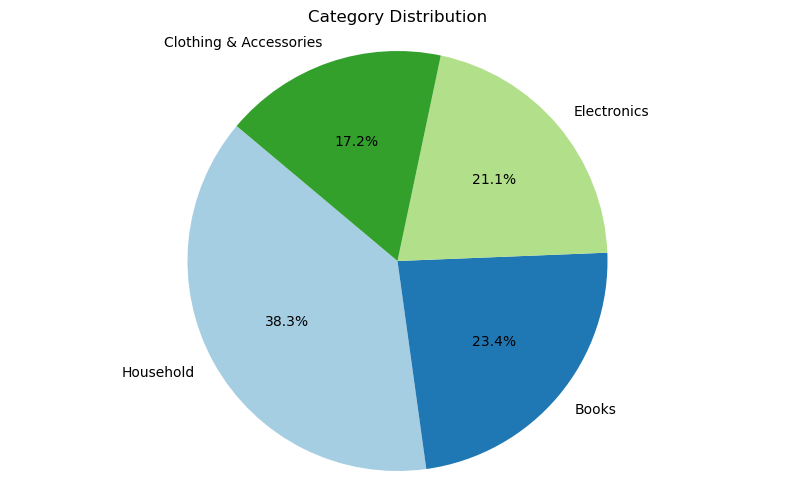

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categories = df['Text'].unique()
values = df['Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


### Here we can see Household occupies around 38 percent and clothing and accessories is only 17 percent which is less than half.

### Model Performance: Classifiers might get biased towards the majority class (Household) because it has more training examples.

### So we can use class_weight='balanced' parameter to save model from getting deviated towards the large samples category

Converting categorical labels to numerical values in part of EDA

First lets try training the model directly and get performance metrics then We can try improving the model using various techniques and more optimal model with less computational energy.

In [13]:
# Add the new column which gives a unique number to each of these labels
df['label_num'] = df['Label'].map({
    'Household': 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

# Checking the results
df.sample(5)


C:\Users\somna\AppData\Local\Temp\ipykernel_300\2912694957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['Label'].map({


,Label,Text,label_num
12305,Household,"Lyra Glassware Galata Long Drink Glass Set, 34...",0
14040,Household,Inalsa Panache 1400-Watt Steam Iron (White/Roy...,0
49127,Electronics,Greatech Cases Mobile Charging Stand Wall Hold...,2
15807,Household,Shreeji Ethnic Powerful Portable and High Powe...,0
6824,Household,Kuber Industries PVC 6 Seater Transparent Dini...,0


In [14]:
df_updated=df[['Text','label_num']]
df_updated.sample(5)

,Text,label_num
48827,JBL GO Portable Wireless Bluetooth Speaker wit...,2
14946,Samsung 253 L 4 Star Frost Free Double Door Re...,0
40997,Kingston SSDNow A400 240GB Internal Solid Stat...,2
50161,Alcatel New T-58 Black Corded Landline Phone w...,2
1504,"Life Before Toilets, Tables, Dressers, Doors, ...",0


In [15]:
X=df_updated[['Text']]
y=df_updated[['label_num']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Print the sizes of each split to verify
print(f"Training set size: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing set size: X_test - {X_test.shape}, y_test - {y_test.shape}")

Training set size: X_train - (40339, 1), y_train - (40339, 1)
Testing set size: X_test - (10085, 1), y_test - (10085, 1)


In [18]:
X_train.shape

(40339, 1)

In [19]:
y_train.shape

(40339, 1)

In [20]:
X_test.shape

(10085, 1)

In [21]:
y_test.shape

(10085, 1)

In [22]:
y_train.value_counts()

label_num
0            15438
1             9442
2             8539
3             6920
Name: count, dtype: int64

Note: First we are trying to measure model performace without data preprocessing ie Lower case
Tokenization
Removing special characters
Removing stop words and punctuation 
Stemming etc anyways for basic preprocessing we will be using TFIDF and see how it performs then modify the data accordingly.

First lets try training the model directly and get performance metrics then We can try improving the model using various techniques and more optimal model with less computational energy.

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.  
Note:  
  
use TF-IDF for pre-processing the text.  

use KNN as the classifier  

print the classification report.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])


In [26]:
# Fit the pipeline on training data
clf.fit(X_train['Text'], y_train)

# Predict on test data
y_pred = clf.predict(X_test['Text'])

# Print classification report
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3875
           1       0.97      0.96      0.96      2378
           2       0.95      0.95      0.95      2082
           3       0.97      0.97      0.97      1750

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# Use ravel() to flatten y_train and y_test if they are 2D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:


# Assuming X_train and X_test are DataFrames with 'Text' column containing text data
# and y_train, y_test are the corresponding target labels


# Create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

# Fit the pipeline on the training data
clf.fit(X_train['Text'], y_train)

# Predict on the test data
y_pred = clf.predict(X_test['Text'])

# Print the classification report
print(classification_report(y_test, y_pred))


In [23]:
# pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Assume X_train and y_train are your original unbalanced training data

# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train[['Text']], y_train)

In [26]:

# Create a pipeline object with adjusted parameters
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'))         
])

# Fit the pipeline on the resampled training data
clf.fit(X_train_resampled['Text'], y_train_resampled)

# Predict on the test data
y_pred = clf.predict(X_test['Text'])

# Print the classification report
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3875
           1       0.98      0.98      0.98      2378
           2       0.96      0.97      0.97      2082
           3       0.97      0.98      0.98      1750

    accuracy                           0.98     10085
   macro avg       0.98      0.98      0.98     10085
weighted avg       0.98      0.98      0.98     10085



see after balancing data set and doing hyper parameter tuning the performance of the model already went up now lets try applying different algoritms with parameters


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Create a pipeline with TfidfVectorizer and DecisionTreeClassifier
# clf_dt = Pipeline([
#     ('vectorizer_tfidf', TfidfVectorizer()),    
#     ('DecisionTree', DecisionTreeClassifier())
# ])

# # Define parameter grid for grid search
# param_grid_dt = {
#     'DecisionTree__max_depth': [None, 10, 20, 30],
#     'DecisionTree__min_samples_split': [2, 5, 10],
#     'DecisionTree__min_samples_leaf': [1, 2, 4],
# }

# # Perform grid search with cross-validation
# grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1)
# grid_search_dt.fit(X_train['Text'], y_train)

# # Print best parameters and best score
# print("Best parameters found: ", grid_search_dt.best_params_)
# print("Best cross-validation accuracy: {:.2f}".format(grid_search_dt.best_score_))

# # Predict on the test data using the best model
# y_pred_dt = grid_search_dt.best_estimator_.predict(X_test['Text'])

# # Print the classification report
# print(classification_report(y_test, y_pred_dt))





As we know Dession tree model may give better accuracy but time taken will be much more than remaining classifier for this case it would take approximately 5 times more than the remaining models. So rerunning would take a lot of time so commenting out the code.

In [27]:
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
clf_mnb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),    
    ('MultinomialNB', MultinomialNB())
])

# Define the parameter grid for alpha
param_grid_mnb = {
    'MultinomialNB__alpha': [0.0001,0.05]  # Example values for alpha
}

# Perform grid search with cross-validation
grid_search_mnb = GridSearchCV(clf_mnb, param_grid_mnb, cv=5, scoring='f1_macro', verbose=1)
grid_search_mnb.fit(X_train_resampled['Text'], y_train_resampled)

# Print best parameters and best score
print("Best parameters found: ", grid_search_mnb.best_params_)
print("Best cross-validation F1-score: {:.2f}".format(grid_search_mnb.best_score_))

# Predict on the test data using the best model
y_pred_mnb_best = grid_search_mnb.best_estimator_.predict(X_test['Text'])

# Print the classification report
print(classification_report(y_test, y_pred_mnb_best))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best parameters found:  {'MultinomialNB__alpha': 0.0001}
Best cross-validation F1-score: 0.98
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3875
           1       0.98      0.95      0.97      2378
           2       0.95      0.97      0.96      2082
           3       0.98      0.98      0.98      1750

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [28]:




# Create a pipeline with TfidfVectorizer and MultinomialNB
clf_mnb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),    
    ('MultinomialNB', MultinomialNB())
])

# Fit the pipeline on the resampled training data
clf_mnb.fit(X_train_resampled['Text'], y_train_resampled)

# Predict on the test data
y_pred_mnb = clf_mnb.predict(X_test['Text'])

# Print the classification report
print(classification_report(y_test, y_pred_mnb))


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3875
           1       0.97      0.93      0.95      2378
           2       0.93      0.95      0.94      2082
           3       0.95      0.99      0.97      1750

    accuracy                           0.95     10085
   macro avg       0.95      0.95      0.95     10085
weighted avg       0.95      0.95      0.95     10085



In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Assuming X_train_resampled and y_train_resampled are already defined from oversampling

# Create a pipeline with TfidfVectorizer and LogisticRegression
clf_logistic = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),    
    ('LogisticRegression', LogisticRegression(max_iter=1000))  # Adjust max_iter as needed
])

# Define the parameter grid for LogisticRegression
param_grid_logistic = {
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Example values for regularization parameter C
    'LogisticRegression__penalty': ['l1', 'l2'],  # Regularization penalty type
}

# Perform grid search with cross-validation
grid_search_logistic = GridSearchCV(clf_logistic, param_grid_logistic, cv=5, scoring='f1_macro', verbose=1)
grid_search_logistic.fit(X_train_resampled['Text'], y_train_resampled)

# Print best parameters and best score
print("Best parameters found: ", grid_search_logistic.best_params_)
print("Best cross-validation F1-score: {:.2f}".format(grid_search_logistic.best_score_))

# Predict on the test data using the best model
y_pred_logistic_best = grid_search_logistic.best_estimator_.predict(X_test['Text'])

# Print the classification report
print(classification_report(y_test, y_pred_logistic_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best parameters found:  {'LogisticRegression__C': 10.0, 'LogisticRegression__penalty': 'l2'}
Best cross-validation F1-score: 0.99
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3875
           1       0.99      0.98      0.98      2378
           2       0.97      0.98      0.98      2082
           3       0.99      0.99      0.99      1750

    accuracy                           0.98     10085
   macro avg       0.98      0.98      0.98     10085
weighted avg       0.98      0.98      0.98     10085



Now lets try doing more preprocessing like Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [ ]:
# !pip install spacy


In [ ]:
# !python -m spacy download en_core_web_sm


In [30]:

### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [31]:
df['preprocessed_txt'] = df_updated['Text'].apply(preprocess) 

C:\Users\somna\AppData\Local\Temp\ipykernel_300\3942021276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_txt'] = df_updated['Text'].apply(preprocess)


In [35]:
df.sample(5)

,Label,Text,label_num,preprocessed_txt
34101,Clothing & Accessories,Fancyadda Men's Khadi Cotton Handkerchiefs (Pa...,3,Fancyadda Men Khadi Cotton Handkerchiefs Pack ...
42303,Electronics,Taslar Briefcase Messenger Shoulder Bag Strap ...,2,Taslar Briefcase Messenger Shoulder Bag Strap ...
35891,Clothing & Accessories,Pearl Ocean Men's Satin Shirt (Sandy Brown) Sm...,3,Pearl Ocean Men Satin Shirt Sandy Brown Smooth...
9795,Household,Delight Chef - A brand of Delight Retail Glass...,0,Delight Chef brand Delight Retail Glass Cookie...
45878,Electronics,Logitech M235 Wireless Mouse (Grey) Colour:Gre...,2,Logitech M235 Wireless Mouse Grey Colour Grey ...


Build a model with pre processed text

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df[['preprocessed_txt']],  # Ensure this is a DataFrame
    df['label_num'],
    test_size=0.2,  # 20% samples will go to the test dataset
    random_state=2022,
    stratify=df['label_num']
)

# Check shapes to confirm
print("Training set size: X_train - {}, y_train - {}".format(X_train.shape, y_train.shape))
print("Testing set size: X_test - {}, y_test - {}".format(X_test.shape, y_test.shape))

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Trying balancing the dataset with some additional parameters
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


Training set size: X_train - (40339, 1), y_train - (40339,)
Testing set size: X_test - (10085, 1), y_test - (10085,)


In [41]:

# Create a pipeline with TfidfVectorizer and MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

clf_mnb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),    
    ('MultinomialNB', MultinomialNB())
])

# Define the parameter grid for alpha
param_grid_mnb = {
    'MultinomialNB__alpha': [0.0001, 0.05, 0.1, 0.5, 1.0]  # Example values for alpha
}

# Perform grid search with cross-validation
grid_search_mnb = GridSearchCV(clf_mnb, param_grid_mnb, cv=5, scoring='f1_macro', verbose=1)
grid_search_mnb.fit(X_train_resampled['preprocessed_txt'], y_train_resampled)

# Print best parameters and best score
print("Best parameters found: ", grid_search_mnb.best_params_)
print("Best cross-validation F1-score: {:.2f}".format(grid_search_mnb.best_score_))

# Predict on the test data using the best model
y_pred_mnb_best = grid_search_mnb.best_estimator_.predict(X_test['preprocessed_txt'])

# Print the classification report
print(classification_report(y_test, y_pred_mnb_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'MultinomialNB__alpha': 0.0001}
Best cross-validation F1-score: 0.98
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.96      0.97      2364
           2       0.96      0.96      0.96      2124
           3       0.97      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [47]:

# Create a pipeline object with adjusted parameters
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'))         
])

# Fit the pipeline on the resampled training data
clf.fit(X_train_resampled['preprocessed_txt'], y_train_resampled)

# Predict on the test data
y_pred = clf.predict(X_test['preprocessed_txt'])

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      3863
           1       0.63      1.00      0.77      2364
           2       0.99      0.82      0.90      2124
           3       0.99      0.81      0.89      1734

    accuracy                           0.86     10085
   macro avg       0.90      0.86      0.86     10085
weighted avg       0.91      0.86      0.87     10085



In [54]:
# Voting Classifier
from sklearn.svm import SVC
knc= KNeighborsClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [55]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('KNN', KNN),('log',LogisticRegression)],voting='soft')


In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define individual classifiers
clf_nb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('MultinomialNB', MultinomialNB())
])

clf_knn = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf_lr = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('LogisticRegression', LogisticRegression(solver='liblinear', max_iter=1000))
])

# Define the voting classifier
voting = VotingClassifier(
    estimators=[
        ('nb', clf_nb),
        ('knn', clf_knn),
        ('lr', clf_lr)
    ],
    voting='hard'
)

# Fit the voting classifier on the training data
voting.fit(X_train_resampled['preprocessed_txt'], y_train_resampled)

# Predict on the test data
y_pred_voting = voting.predict(X_test['preprocessed_txt'])

# Print the classification report
print(classification_report(y_test, y_pred_voting))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3863
           1       0.97      0.97      0.97      2364
           2       0.97      0.95      0.96      2124
           3       0.97      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
final_estimator=RandomForestClassifier()

estimators=[
        ('nb', clf_nb),
        ('knn', clf_knn),
        ('lr', clf_lr)
    ]
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [70]:
clf.fit(X_train_resampled['preprocessed_txt'], y_train_resampled)
y_pred = clf.predict(X_test['preprocessed_txt'])


NameError: name 'accuracy_score' is not defined

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Print recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Print F1-score
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9781854238968766
Precision: 0.9781998187445095
Recall: 0.9781854238968766
F1-score: 0.978184805640846
